JOB DONE 0:00:11.884029


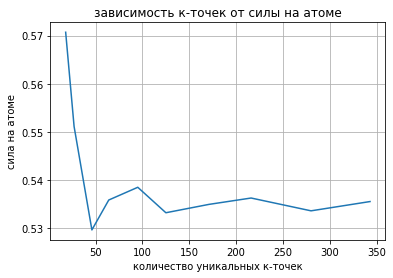

In [25]:
import os #заметил, что в юпитере для работы с датасаенс библиотеками можно их не импортировать... или это баг?
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
start_time = datetime.now()

output = open('x.txt', 'w')
output = open('y.txt', 'w')

with open('C.scf.in') as f:
    lines = f.readlines()
for cut in ['4 4 4  0 0 0','5 5 5  0 0 0', '6 6 6  0 0 0', '7 7 7  0 0 0', '8 8 8  0 0 0','9 9 9  0 0 0','10 10 10  0 0 0', '11 11 11  0 0 0', '12 12 12  0 0 0', '13 13 13  0 0 0']:
    #что-то мне лень было прописывать дальше, а вариант, аналогичный np.arange я сходу не придумал
    lines[28] = '{}'.format(cut)
    with open('input.in', 'w') as f:
        for l in lines:
             f.write(l)
    os.system('../bin/pw.x < input.in > output.txt')
    with open('output.txt') as f:
        for d in f.readlines():
            if 'Total force =' in d:
                #print(d[23:32]) убрал, чтобы освободить место
                output = open('y.txt', 'a')
                print (d[23:32], file= output)
                output.close()
    with open('output.txt') as f:
        for a in f.readlines():
            if 'number of k points=' in a:
                #print(a[27:30])
                output = open('x.txt', 'a')
                print (a[27:30], file = output)
                output.close()
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
plt.title('зависимость к-точек от силы на атоме')
plt.xlabel('количество уникальных к-точек')
plt.ylabel('сила на атоме')
plt.grid()
plt.plot(x,y)
plt.savefig('result.jpg')
time.sleep(1)
print('JOB DONE', datetime.now() - start_time)

    График показывает аналогичное поведение системы: мы увеличиваем плотность(частоту) сетки, тем самым увеличивая точность (сходимость), график получился не слишком информативным, но можно сказать, что использовать сетку и количеством уникальных к-точек больше 100 не имеет смысла.

 &CONTROL
                 calculation = 'scf' ,
                restart_mode = 'from_scratch' ,
                      outdir = '/mnt/d/qe-6.5/task1/' ,
                  pseudo_dir = '/mnt/d/qe-6.5/task1/' ,
                      prefix = 'diamond' ,
                     tstress = .true. ,
                     tprnfor = .true. ,
 /
 &SYSTEM
                       ibrav = 2,
                   celldm(1) = 6.6,
                         nat = 2,
                        ntyp = 1,
                     ecutwfc = 20 ,
 /
 &ELECTRONS
                    conv_thr = 1.0d-8 ,
                 mixing_mode = 'plain' ,
                 mixing_beta = 0.7 ,
             diagonalization = 'david' ,
 /
ATOMIC_SPECIES
    C   12.01100  C.pz-vbc.UPF 
ATOMIC_POSITIONS 
    C      0.000000000    0.000000000    0.000000000    
    C      0.250000000    0.300000000    0.250000000    
K_POINTS {automatic}
   9 9 9   0 0 0

Program PWSCF v.6.5 starts on 20May2020 at  0:10:34 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Parallel version (MPI), running on     1 processors

     MPI processes distributed on     1 nodes
     Waiting for input...
     Reading input from standard input
     Message from routine read_cards :
     DEPRECATED: no units specified in ATOMIC_POSITIONS card
     Message from routine read_cards :
     ATOMIC_POSITIONS: units set to alat

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  3

     Subspace diagonalization in iterative solution of the eigenvalue problem:
     a serial algorithm will be used


     G-vector sticks info
     --------------------
     sticks:   dense  smooth     PW     G-vecs:    dense   smooth      PW
     Sum         121     121     55                  893      893     259



     bravais-lattice index     =            2
     lattice parameter (alat)  =       6.6000  a.u.
     unit-cell volume          =      71.8740 (a.u.)^3
     number of atoms/cell      =            2
     number of atomic types    =            1
     number of electrons       =         8.00
     number of Kohn-Sham states=            4
     kinetic-energy cutoff     =      20.0000  Ry
     charge density cutoff     =      80.0000  Ry
     convergence threshold     =      1.0E-08
     mixing beta               =       0.7000
     number of iterations used =            8  plain     mixing
     Exchange-correlation=  SLA  PZ   NOGX NOGC
                           (   1   1   0   0   0   0   0)

     celldm(1)=   6.600000  celldm(2)=   0.000000  celldm(3)=   0.000000
     celldm(4)=   0.000000  celldm(5)=   0.000000  celldm(6)=   0.000000

     crystal axes: (cart. coord. in units of alat)
               a(1) = (  -0.500000   0.000000   0.500000 )  
               a(2) = (   0.000000   0.500000   0.500000 )  
               a(3) = (  -0.500000   0.500000   0.000000 )  

     reciprocal axes: (cart. coord. in units 2 pi/alat)
               b(1) = ( -1.000000 -1.000000  1.000000 )  
               b(2) = (  1.000000  1.000000  1.000000 )  
               b(3) = ( -1.000000  1.000000 -1.000000 )  


     PseudoPot. # 1 for C  read from file:
     /mnt/d/qe-6.5/task1/C.pz-vbc.UPF
     MD5 check sum: 902016046bf83189dffe9ec1c2a452ce
     Pseudo is Norm-conserving, Zval =  4.0
     Generated by new atomic code, or converted to UPF format
     Using radial grid of  269 points,  1 beta functions with: 
                l(1) =   0

     atomic species   valence    mass     pseudopotential
        C              4.00    12.01100     C ( 1.00)

      4 Sym. Ops. (no inversion) found



   Cartesian axes

     site n.     atom                  positions (alat units)
         1           C   tau(   1) = (   0.0000000   0.0000000   0.0000000  )
         2           C   tau(   2) = (   0.2500000   0.3000000   0.2500000  )

     number of k points=   343

     Number of k-points >= 100: set verbosity='high' to print them.

     Dense  grid:      893 G-vectors     FFT dimensions: (  15,  15,  15)

     Estimated max dynamical RAM per process >       2.97 MB

     Initial potential from superposition of free atoms

     starting charge    7.99994, renormalised to    8.00000
     Starting wfcs are    8 randomized atomic wfcs

     total cpu time spent up to now is        0.2 secs

     Self-consistent Calculation

     iteration #  1     ecut=    20.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.00E-02,  avg # of iterations =  2.0

     total cpu time spent up to now is        0.4 secs

     total energy              =     -22.12093340 Ry
     Harris-Foulkes estimate   =     -22.16129139 Ry
     estimated scf accuracy    <       0.09922027 Ry

     iteration #  2     ecut=    20.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.24E-03,  avg # of iterations =  1.1

     total cpu time spent up to now is        0.6 secs

     total energy              =     -22.12626559 Ry
     Harris-Foulkes estimate   =     -22.12702882 Ry
     estimated scf accuracy    <       0.00335039 Ry

     iteration #  3     ecut=    20.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  4.19E-05,  avg # of iterations =  2.0

     total cpu time spent up to now is        0.8 secs

     total energy              =     -22.12665397 Ry
     Harris-Foulkes estimate   =     -22.12667266 Ry
     estimated scf accuracy    <       0.00008014 Ry

     iteration #  4     ecut=    20.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  1.00E-06,  avg # of iterations =  2.3

     total cpu time spent up to now is        1.1 secs

     total energy              =     -22.12667011 Ry
     Harris-Foulkes estimate   =     -22.12667098 Ry
     estimated scf accuracy    <       0.00000160 Ry

     iteration #  5     ecut=    20.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  2.00E-08,  avg # of iterations =  2.2

     total cpu time spent up to now is        1.3 secs

     total energy              =     -22.12667061 Ry
     Harris-Foulkes estimate   =     -22.12667064 Ry
     estimated scf accuracy    <       0.00000007 Ry

     iteration #  6     ecut=    20.00 Ry     beta= 0.70
     Davidson diagonalization with overlap
     ethr =  8.27E-10,  avg # of iterations =  2.1

     total cpu time spent up to now is        1.6 secs

     End of self-consistent calculation

     Number of k-points >= 100: set verbosity='high' to print the bands.

     highest occupied level (ev):    18.2645

!    total energy              =     -22.12667062 Ry
     Harris-Foulkes estimate   =     -22.12667062 Ry
     estimated scf accuracy    <          5.2E-10 Ry

     The total energy is the sum of the following terms:

     one-electron contribution =       9.37586003 Ry
     hartree contribution      =       1.63377211 Ry
     xc contribution           =      -7.11705114 Ry
     ewald contribution        =     -26.01925162 Ry

     convergence has been achieved in   6 iterations

     Forces acting on atoms (cartesian axes, Ry/au):

     atom    1 type  1   force =     0.00000000    0.37867572    0.00000000
     atom    2 type  1   force =     0.00000000   -0.37867572    0.00000000

     Total force =     0.535528     Total SCF correction =     0.000002


     Computing stress (Cartesian axis) and pressure

          total   stress  (Ry/bohr**3)                   (kbar)     P=     -803.14
  -0.00510273   0.00000000  -0.00238619         -750.64        0.00     -351.02
   0.00000000  -0.00617335   0.00000000            0.00     -908.13        0.00
  -0.00238619   0.00000000  -0.00510273         -351.02        0.00     -750.64


     Writing output data file /mnt/d/qe-6.5/task1/diamond.save/

     init_run     :      0.16s CPU      0.17s WALL (       1 calls)
     electrons    :      1.20s CPU      1.40s WALL (       1 calls)
     forces       :      0.00s CPU      0.01s WALL (       1 calls)
     stress       :      0.02s CPU      0.02s WALL (       1 calls)

     Called by init_run:
     wfcinit      :      0.14s CPU      0.16s WALL (       1 calls)
     potinit      :      0.00s CPU      0.00s WALL (       1 calls)
     hinit0       :      0.02s CPU      0.01s WALL (       1 calls)

     Called by electrons:
     c_bands      :      1.05s CPU      1.25s WALL (       6 calls)
     sum_band     :      0.14s CPU      0.15s WALL (       6 calls)
     v_of_rho     :      0.00s CPU      0.00s WALL (       7 calls)
     mix_rho      :      0.00s CPU      0.00s WALL (       6 calls)

     Called by c_bands:
     init_us_2    :      0.02s CPU      0.03s WALL (    5145 calls)
     cegterg      :      1.05s CPU      1.14s WALL (    2058 calls)

     Called by sum_band:

     Called by *egterg:
     h_psi        :      0.83s CPU      0.87s WALL (    6406 calls)
     g_psi        :      0.02s CPU      0.02s WALL (    4005 calls)
     cdiaghg      :      0.19s CPU      0.16s WALL (    6063 calls)

     Called by h_psi:
     h_psi:calbec :      0.02s CPU      0.03s WALL (    6406 calls)
     vloc_psi     :      0.80s CPU      0.78s WALL (    6406 calls)
     add_vuspsi   :      0.02s CPU      0.02s WALL (    6406 calls)

     General routines
     calbec       :      0.02s CPU      0.02s WALL (    8121 calls)
     fft          :      0.00s CPU      0.00s WALL (      25 calls)
     ffts         :      0.00s CPU      0.00s WALL (       6 calls)
     fftw         :      0.73s CPU      0.68s WALL (   57958 calls)

     Parallel routines

     PWSCF        :      1.42s CPU      1.70s WALL


   This run was terminated on:   0:10:36  20May2020            

=------------------------------------------------------------------------------=
   JOB DONE.
=------------------------------------------------------------------------------=